In [296]:
from fpar_workflow import *
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [236]:
from sklearn.decomposition import PCA

In [257]:
pca = PCA()
X_reduced = pca.fit_transform(fp_workflow.cdl_matrix)
X_reduced

array([[  4.01515429e-01,   2.92958218e-01,   3.62597255e-01,
          5.44431247e-15],
       [  4.19026062e-01,   2.16592270e-01,   2.30405792e-02,
          1.20001916e-15],
       [  3.06336596e-01,   1.68920306e-01,   1.62997093e-01,
          4.71919945e-17],
       ..., 
       [  3.07608029e-01,  -1.13777492e-01,   6.05554908e-02,
          6.12955128e-16],
       [  1.05789967e-02,  -1.87161042e-01,  -1.54277993e-02,
          6.73293263e-16],
       [  1.45582501e-01,  -1.28654642e-01,   1.76029396e-02,
          6.35065462e-16]])

In [353]:
fp_workflow = Fpar_flow()
p4 = (41.53067026099156,-90.31086962890625)
p3 = (41.53067026099156, -90.29682275390625)
p2 = (41.55638178482896,-90.29682275390625)
p1 = (41.55638178482896, -90.3186962890625)

In [354]:
fpar_path = 'FPAR_A2016185.hdf'
cdl_path = 'cdl_chicago.npy'

In [355]:
fp_workflow.cdl_matrix

In [356]:
fp_workflow.init_workflow(fpar_path, cdl_path, p1, p2, p3, p4)

(1552, 6275) (1552, 6279)
(1557, 6279) (1557, 6277)
fuckit
(array([  85.7710763 ,   81.01829318,  106.00607548,   66.74423031]), array([ 778.96294232]), 4, array([ 2.42635342,  1.18245225,  0.56001946,  0.34958254]))


C:\Users\Bowen\Desktop\work\Satellite_Big_Data_Scripts\fpar_workflow.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  assert self.cdl_matrix != None and self.fpar_vals != None


In [261]:
fp_workflow.continue_workflow(fpar_path, p1, p2, p3, p4)

(1549, 6275) (1549, 6572)
(1563, 6572) (1563, 6277)
fuckit
(array([ 67.14582447,  68.10530203,  72.832421  ,  68.15809251]), array([ 192351.69219643]), 4, array([ 41.02761123,  21.67232743,  13.16324277,   5.07118152]))


C:\Users\Bowen\Desktop\work\Satellite_Big_Data_Scripts\fpar_workflow.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  assert self.cdl_matrix != None and self.fpar_vals != None


c:\users\bowen\anaconda3\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.8503
Date:                Mon, 19 Mar 2018   Prob (F-statistic):              0.495
Time:                        17:43:53   Log-Likelihood:                -50.908
No. Observations:                  15   AIC:                             109.8
Df Residuals:                      11   BIC:                             112.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            85.7711      4.411     19.444      0.000      76.062      95.480
x2            81.0183     14.778      5.483      0.000      48.493     113.543
x3           106.0061     22.704      4.669      0.001      56.035     155.977
x4            66.7442     10.707      6.234      0.000      43.179      90.310
==============================================================================
Omnibus:                        0.192   Durbin-Watson:                   2.373
Prob(Omnibus):                  0.908   Jarque-Bera (JB):                0.350
Skew:                          -0.202   Prob(JB):                        0.839
Kurtosis:                       2.370   Cond. No.                         6.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

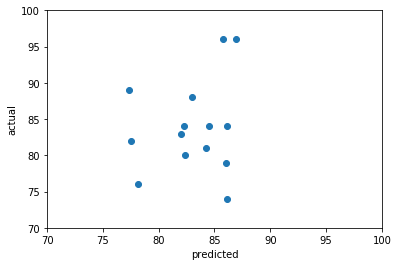

In [357]:
y_hat = fp_workflow.cdl_matrix@fp_workflow.reg_coeffs

y = fp_workflow.fpar_vals
x = fp_workflow.cdl_matrix



plt.xlim(70, 100)
plt.ylim(70, 100)
plt.scatter(y_hat, y)
plt.xlabel('predicted')
# xlim((70,100))
# ylim((70, 100))
plt.ylabel('actual')


# yx = np.append(x, np.array(y).reshape(-1,1), axis = 1)
# yx[:,:-1]

# sampleyx = yx[np.random.choice(yx.shape[0], 1000, replace=False)]
# SST = np.sum((y - np.mean(y))**2)
# SSE = np.sum((y - y_hat)**2)
# SSR = np.sum((y_hat - np.mean(y))**2)
# R_square = 1 - SSE/SST
# print(R_square)

X_reduced = sm.add_constant(X_reduced)
model = sm.OLS(y, x).fit()
model.summary()
# np.linalg.cond(model.model.exog)

In [323]:
x3 = fp_workflow.cdl_matrix[:,3]
x12 = fp_workflow.cdl_matrix[:,[0,1,2]]
# x12 = sm.add_constant(x12)
collinearity = sm.OLS(x3, x12).fit()
collinearity.summary()
# x12
# x12
# np.sum(x12, axis = 1) + x3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     318.4
Date:                Mon, 19 Mar 2018   Prob (F-statistic):          1.47e-174
Time:                        17:19:09   Log-Likelihood:                 435.20
No. Observations:                2454   AIC:                            -864.4
Df Residuals:                    2451   BIC:                            -847.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0708      0.008      9.383      0.000       0.056       0.086
x2             0.0598      0.012      5.181      0.000       0.037       0.082
x3             1.0093      0.045     22.636      0.000       0.922       1.097
==============================================================================
Omnibus:                     1162.609   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6112.496
Skew:                           2.259   Prob(JB):                         0.00
Kurtosis:                       9.275   Cond. No.                         6.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
# from sklearn.linear_model import Ridge
import sklearn
sklearn.Linear_model

AttributeError: module 'sklearn' has no attribute 'Linear_model'

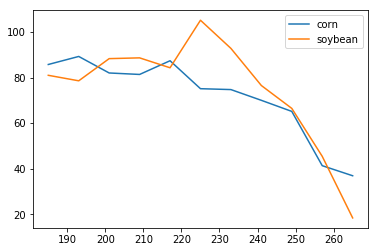

In [359]:
import matplotlib.pyplot as plt
%matplotlib inline
coeffs = np.array(coeffs)
x = [185+ i for i in range(0, 81, 8)]
plt.plot(x, coeffs[:,0], label = 'corn')
plt.plot(x, coeffs[:,1], label = 'soybean')
# plt.plot(x, coeffs[:,2], label = 'grass')
# plt.plot(x, coeffs[:,3], label = 'biase')
plt.legend()

0.149317318397 0.00636143446433 0.290937495891


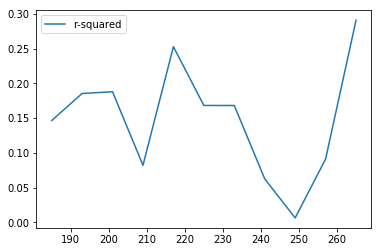

In [235]:
plt.figure()
plt.plot(x, rsquares, label = 'r-squared')
plt.legend()
print(np.mean(rsquares), np.min(rsquares), np.max(rsquares))


In [358]:
coeffs = []
rsquares = []
for i in range(185, 266, 8):
    prefix ='FPAR_A2016'
    suffix = '.hdf'
    query = prefix + str(i) + suffix
    fp_workflow.continue_workflow(query, p1, p2, p3, p4)
    coeffs.append(fp_workflow.reg_coeffs)
    y = fp_workflow.fpar_vals
    x = fp_workflow.cdl_matrix
    yx = np.append(x, np.array(y).reshape(-1,1), axis = 1)
    
    np.random.shuffle(yx)
    sampleyx = yx
#     sampleyx = yx[np.random.choice(yx.shape[0], 100, replace=False)]
    y_ = sampleyx[:,-1]
    x_ = sampleyx[:,:-1]
    r_squared = sm.OLS(y_, x_).fit().rsquared
    rsquares.append(r_squared)

(1552, 6275) (1552, 6279)
(1557, 6279) (1557, 6277)
fuckit
(array([  85.7710763 ,   81.01829318,  106.00607548,   66.74423031]), array([ 778.96294232]), 4, array([ 2.42635342,  1.18245225,  0.56001946,  0.34958254]))


C:\Users\Bowen\Desktop\work\Satellite_Big_Data_Scripts\fpar_workflow.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  assert self.cdl_matrix != None and self.fpar_vals != None


(1552, 6275) (1552, 6279)
(1557, 6279) (1557, 6277)
fuckit
(array([  89.30411247,   78.60330194,  102.1231668 ,   67.30180423]), array([ 464.24816004]), 4, array([ 2.49568581,  1.21623186,  0.57010408,  0.3740793 ]))
(1552, 6275) (1552, 6279)
(1557, 6279) (1557, 6277)
fuckit
(array([ 82.04338882,  88.34563677,  79.58461923,  64.04032245]), array([ 117.52432286]), 4, array([ 2.44911802,  1.17760732,  0.56252109,  0.34517441]))
(1552, 6275) (1552, 6279)
(1557, 6279) (1557, 6277)
fuckit
(array([ 81.39812755,  88.68257435,  91.14383367,  79.73398508]), array([ 285.18097055]), 4, array([ 2.38368166,  1.17558974,  0.47648288,  0.32765116]))
(1552, 6275) (1552, 6279)
(1557, 6279) (1557, 6277)
fuckit
(array([ 87.4160618 ,  84.32978023,  66.50022316,  94.96046738]), array([ 216.38210453]), 4, array([ 2.22373496,  1.11556043,  0.54919563,  0.31141946]))
(1552, 6275) (1552, 6279)
(1557, 6279) (1557, 6277)
fuckit
(array([  75.13822755,  105.20854746,   67.49428348,   66.27659868]), array([ 26.4213

In [29]:
#matplotlib inline
plt.hist(np.sum(fp_workflow.cdl_matrix[:,0:2], axis = 1))

(array([   44.,    31.,    29.,    71.,    72.,   104.,   177.,   370.,
         1247.,  4049.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

In [7]:
fp_workflow.continue_workflow('FPAR_A2016185.hdf')

(1652, 6695) (1652, 6709)
(1662, 6709) (1662, 6695)
fuckit
(array([  83.90493839,   76.36140545,    0.        ,  101.31082992]), array([], dtype=float64), 3, array([ 5.92926643,  3.54830834,  0.39245072,  0.        ]))


C:\Users\Bowen\Desktop\work\Satellite_Big_Data_Scripts\fpar_workflow.py:55: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  assert self.cdl_matrix != None and self.fpar_vals != None


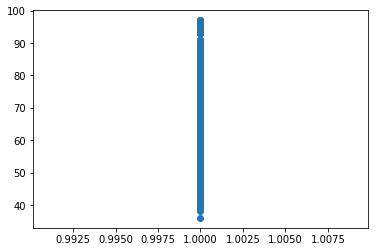

In [21]:
%matplotlib inline
plt.scatter(fp_workflow.cdl_matrix[:,3], fp_workflow.fpar_vals)

In [15]:
np.sum(fp_workflow.cdl_matrix@fp_workflow.reg_coeffs - fp_workflow.fpar_vals)

2.0037305148434825e-12

In [16]:
len(fp_workflow.fpar_vals)

72

In [6]:
import statsmodels.api as sm

In [11]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha = 1.0, fit_intercept = False)
clf.fit(x,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
print(clf.coef_, fp_workflow.reg_coeffs)




[ 85.10776907  80.00577495  69.80132729  67.5235043 ] [ 85.0903471   79.98963568  71.59279432  67.71203231]


Text(0.5,1,'')

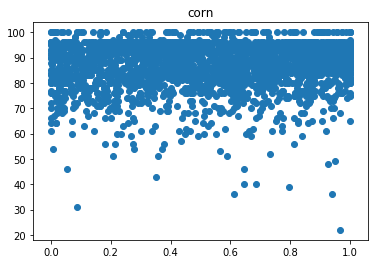

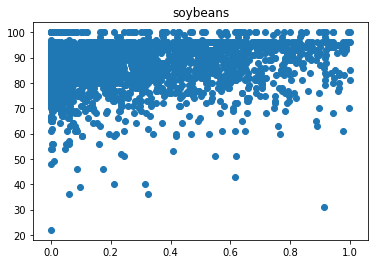

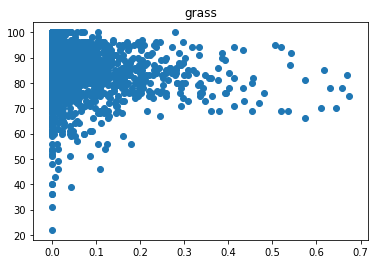

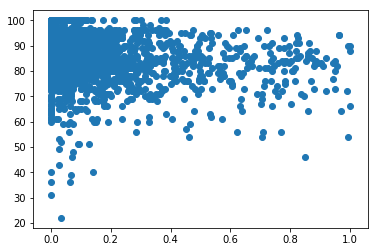

In [309]:
%matplotlib inline
x = fp_workflow.cdl_matrix
y = fp_workflow.fpar_vals
plt.scatter(x[:,0], y)
plt.title('corn')
plt.figure()
plt.scatter(x[:,1], y)
plt.title('soybeans')
plt.figure()
plt.scatter(x[:,2], y)
plt.title('grass')

plt.figure()
plt.scatter(x[:,3], y)
plt.title('')

In [32]:
qcs = []
for i in fp_workflow.fp_ptrs:
    qcs.append(fp_workflow.fpar_.qc[i[0], i[1]])
    
# good_qc(qcs)
plt.hist(fp_workflow.cdl_matrix[:,0])

(array([ 992.,  554.,  606.,  676.,  644.,  607.,  576.,  518.,  486.,  535.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

In [31]:
# plt.scatter(np.arange(47), y)
plt.hist(np.sum(fp_workflow.cdl_matrix[:,0:2], axis = 1))

(array([   44.,    31.,    29.,    71.,    72.,   104.,   177.,   370.,
         1247.,  4049.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

In [118]:
fp_workflow.cdl_matrix[:,3] - 1 +  fp_workflow.cdl_matrix[:,2] + fp_workflow.cdl_matrix[:,1] + fp_workflow.cdl_matrix[:,0]

array([  0.00000000e+00,   0.00000000e+00,   1.11022302e-16, ...,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00])

In [151]:
x

[185, 193, 201, 209, 217, 225, 233, 241, 249, 257, 265]

In [154]:
fp_workflow.cdl_matrix[np.random.choice(fp_workflow.cdl_matrix.shape[0], 3, replace=False)]

array([[ 0.40522876,  0.44117647,  0.04901961,  0.10457516],
       [ 0.00617284,  0.        ,  0.        ,  0.99382716],
       [ 0.33986928,  0.66013072,  0.        ,  0.        ]])

In [160]:
a = np.array([1,1,1])
a.reshape(-1, 1)

array([[1],
       [1],
       [1]])

In [279]:
bad = []
for i in range(len(y)):
    if x[i][0] >= 0.9 and y[i] <= 60:
        print(i)
        bad.append(i)

17
26
28
40
42
57
165
414
426
461
537
599
742
968
1032
1044
1051
1055
1056
1057
1065
1105
1107
1121
1135
1136
1150
1163
1180
1185
1194
1222
1262
1314
1329
1356
1365
1397
1409
1451
1465
1498
1513
1532
1548
1565
1581
1590
1658
1761
1851
1863
1978
1991
1992
2007
2087
2522
2720
2771
2784
2857
2858
2860
2883
2894
2918
3020
3023
3139
3253
3268
3278
3292
3346
3364
3390
3426
3461
3497
3637
3681
3741
3742
3743
3750
3751
3754
3764
3892
3906


In [285]:
bad_points = [fp_workflow.fp_ptrs[i] for i in bad]
# qcs = [fp_workflow.fpar_.qc[]]
qcs = []
for i in bad_points:
    qcs.append(fp_workflow.fpar_.qc[i[0], i[1]])
    

In [286]:
good_qc(qcs)

1.0

In [287]:
proc = fpar_utils()
proc.coords_to_ind(50, -69.2724108461701)

(0, 10145)

In [282]:
ret

[(-90.313070850359935, 41.52256760817977),
 (-90.3076311761086, 41.544318559782923),
 (-90.3076311761086, 41.533443083981346),
 (-90.302191501857251, 41.544318559782923),
 (-90.302191501857251, 41.533443083981346),
 (-90.296751827605902, 41.533443083981346),
 (-90.247794759343833, 41.544318559782923),
 (-90.144440948568331, 41.576944987187659),
 (-90.139001274316996, 41.576944987187659),
 (-90.128121925814312, 41.511692132378187),
 (-90.095483880306261, 41.549756297683714),
 (-90.073725183300894, 41.528005346080555),
 (-90.019328440787476, 41.511692132378187),
 (-89.93229365276602, 41.528005346080555),
 (-89.905095281509304, 41.538880821882131),
 (-89.899655607257955, 41.538880821882131),
 (-89.89421593300662, 41.571507249286867),
 (-89.89421593300662, 41.549756297683714),
 (-89.89421593300662, 41.544318559782923),
 (-89.89421593300662, 41.538880821882131),
 (-89.888776258755286, 41.571507249286867),
 (-89.872457236001253, 41.582382725088443),
 (-89.872457236001253, 41.571507249286867)

In [289]:
bad_points

[array([1559, 6277]),
 array([1555, 6278]),
 array([1557, 6278]),
 array([1555, 6279]),
 array([1557, 6279]),
 array([1557, 6280]),
 array([1555, 6289]),
 array([1549, 6308]),
 array([1549, 6309]),
 array([1561, 6311]),
 array([1554, 6317]),
 array([1558, 6321]),
 array([1561, 6331]),
 array([1558, 6347]),
 array([1556, 6352]),
 array([1556, 6353]),
 array([1550, 6354]),
 array([1554, 6354]),
 array([1555, 6354]),
 array([1556, 6354]),
 array([1550, 6355]),
 array([1548, 6358]),
 array([1550, 6358]),
 array([1549, 6359]),
 array([1548, 6360]),
 array([1549, 6360]),
 array([1549, 6361]),
 array([1562, 6361]),
 array([1549, 6363]),
 array([1554, 6363]),
 array([1549, 6364]),
 array([1548, 6366]),
 array([1548, 6369]),
 array([1557, 6372]),
 array([1557, 6373]),
 array([1554, 6375]),
 array([1563, 6375]),
 array([1551, 6378]),
 array([1549, 6379]),
 array([1548, 6382]),
 array([1548, 6383]),
 array([1562, 6385]),
 array([1562, 6386]),
 array([1549, 6388]),
 array([1549, 6389]),
 array([15

In [294]:
# get_cdl_box_data(self, min_lon, max_lon, min_lat, max_lat)
fp_workflow.fpar_.get_fpar_bound(1551, 6558)

[-88.78452238573291, -88.77908271148156, 41.56063177348529, 41.566069511386075]

In [295]:
fp_workflow.cdl_.get_cdl_box_data(-88.78452238573291, -88.77908271148156, 41.56063177348529,41.566069511386075)

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 5, 5],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [293]:
fp_workflow.cdl_matrix[3764]

array([ 0.98039216,  0.01960784,  0.        ,  0.        ])